In [36]:
import simpful as sf
import matplotlib.pyplot as plt

FS = sf.FuzzySystem(show_banner=False)

<AxesSubplot:xlabel='new_cases', ylabel='Membership degree'>

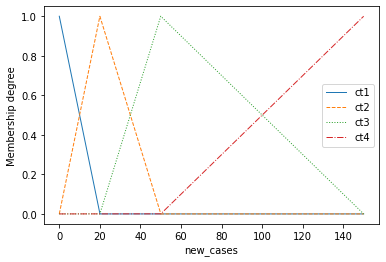

In [40]:
tfs_new_cases = [sf.TriangleFuzzySet(0,0,20, term='ct1'),
                 sf.TriangleFuzzySet(0,20,50, term='ct2'),
                 sf.TriangleFuzzySet(20,50,150, term='ct3'),
                 sf.TriangleFuzzySet(50,150,150, term='ct4'),
                 ]

lv_new_cases = sf.LinguisticVariable(tfs_new_cases,
                                     universe_of_discourse=[0, 150])

FS.add_linguistic_variable("new_cases",
                           lv_new_cases
                           )

_, ax = plt.subplots()
lv_new_cases.draw(ax)

<AxesSubplot:xlabel='hospitalization_rate', ylabel='Membership degree'>

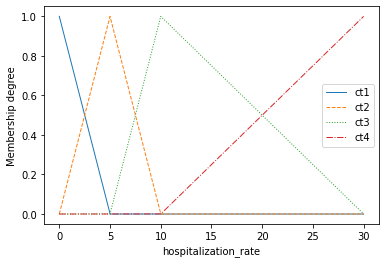

In [43]:
tfs_hospitalization = [sf.TriangleFuzzySet(0,0,5, term='ct1'),
                       sf.TriangleFuzzySet(0,5,10, term='ct2'),
                       sf.TriangleFuzzySet(5,10,30, term='ct3'),
                       sf.TriangleFuzzySet(10,30,30, term='ct4'),
                       ]

lv_hospitalization = sf.LinguisticVariable(tfs_hospitalization,
                                           universe_of_discourse=[0, 30])

FS.add_linguistic_variable("hospitalization_rate",
                           lv_hospitalization
                           )

_, ax = plt.subplots()
lv_hospitalization.draw(ax)

In [27]:
tfs_mortality = [sf.TriangleFuzzySet(0,0,1, term='ct1'),
              sf.TriangleFuzzySet(0,1,2, term='ct2'),
              sf.TriangleFuzzySet(1,2,5, term='ct3'),
              sf.TriangleFuzzySet(2,5,5, term='ct4'),
              ]

FS.add_linguistic_variable("mortality",
                           sf.LinguisticVariable(tfs_mortality,
                                                 universe_of_discourse=[0, 5])
                           )

In [28]:
tfs_testing = [sf.TriangleFuzzySet(0, 0, 5, term='memadai'),
               sf.TriangleFuzzySet(0, 5, 15, term='sedang'),
               sf.TrapezoidFuzzySet(5, 15, 100, 100, term='terbatas')
               ]

FS.add_linguistic_variable("testing",
                           sf.LinguisticVariable(tfs_testing,
                                                 universe_of_discourse=[0, 100])
                           )

In [29]:
tfs_tracing = [sf.TriangleFuzzySet(5, 9, 9, term='memadai'),
               sf.TriangleFuzzySet(0, 5, 9, term='sedang'),
               sf.TriangleFuzzySet(0, 0, 5, term='terbatas')
               ]

FS.add_linguistic_variable("tracing_ratio",
                           sf.LinguisticVariable(tfs_testing,
                                                 universe_of_discourse=[0, 9])
                           )

In [30]:
tfs_bor = [sf.TriangleFuzzySet(0, 0, 70, term='memadai'),
           sf.TriangleFuzzySet(0, 70, 90, term='sedang'),
           sf.TrapezoidFuzzySet(70, 90, 100, 100, term='terbatas')
           ]

FS.add_linguistic_variable("bed_occupancy_rate",
                           sf.LinguisticVariable(tfs_bor,
                                                 universe_of_discourse=[0, 0.9])
                           )

In [31]:
FS.set_crisp_output_value('level_1', 1)
FS.set_crisp_output_value('level_2', 2)
FS.set_crisp_output_value('level_3', 3)
FS.set_crisp_output_value('level_4', 4)

 * Detected Sugeno model type


In [32]:
rules = [
    "IF (hospitalization_rate IS ct1) AND (mortality IS ct1) AND (new_cases IS ct1) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS level_1)",
    "IF (hospitalization_rate IS ct1) AND (mortality IS ct1) AND (new_cases IS ct1) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS level_2)",
    "IF (hospitalization_rate IS ct1) AND (mortality IS ct1) AND (new_cases IS ct1) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS level_2)",
    "IF (hospitalization_rate IS ct2) AND (mortality IS ct2) AND (new_cases IS ct2) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS level_2)",
    "IF (hospitalization_rate IS ct2) AND (mortality IS ct2) AND (new_cases IS ct2) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS level_2)",
    "IF (hospitalization_rate IS ct2) AND (mortality IS ct2) AND (new_cases IS ct2) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS level_3)",
    "IF (hospitalization_rate IS ct3) AND (mortality IS ct3) AND (new_cases IS ct3) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS level_2)",
    "IF (hospitalization_rate IS ct3) AND (mortality IS ct3) AND (new_cases IS ct3) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS level_3)",
    "IF (hospitalization_rate IS ct3) AND (mortality IS ct3) AND (new_cases IS ct3) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS level_3)",
    "IF (hospitalization_rate IS ct4) AND (mortality IS ct4) AND (new_cases IS ct4) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS level_3)",
    "IF (hospitalization_rate IS ct4) AND (mortality IS ct4) AND (new_cases IS ct4) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS level_3)",
    "IF (hospitalization_rate IS ct4) AND (mortality IS ct4) AND (new_cases IS ct4) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS level_4)",
	]

FS.add_rules(rules)

In [33]:
input = {
         'new_cases':53.19,
         'hospitalization_rate':6.42,
         'mortality':5.5,
         'testing':7.28,
         'tracing_ratio':3.0,
         'bed_occupancy_rate':17.91
         }

for label, data in input.items():
    FS.set_variable(label, data)

In [34]:
# output = FS.inference(['ppkm'], verbose=True)
# output = output['ppkm']
output = FS.inference(verbose=True)
output = output['ppkm']
output = 'PPKM level {}'.format(output)
print(output)

PPKM level 0.0
